# Mini Project 1 – Linear & Logistic Regression

## Part A: Linear Regression 

#### 1. Explore and import Boston house prices dataset:

In [1]:
# import necessary libraries
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures
    
# import boston housing data
dataset = load_boston()

# use "DESCR" to have a basic overview of the dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/gimmin-u/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

- As shown above, there are 506 instances (or rows) and 13 different features in this data set. 
- Specific details of the features are explained above.

### 2. Fit a linear regression model using the closed-form solution presented in class. Use k-fold cross-validation to estimate the performance of this model. Print the average of your recorded scores for both the test set and training set.

In [2]:
# define training sets and test sets as X and Y respectively
data = dataset.data

# For X, add a column with 1 for the bias term
X = np.concatenate((np.ones((len(data),1)),data), axis = 1)
Y = dataset.target

In [3]:
# import k-fold cross-validation package
from sklearn.model_selection import KFold

# set K-fold's split parameter as 5
kf = KFold(n_splits=5)

# make lists to store the MSE for each iteration.
mse_train = []
mse_test = []

for train, test in kf.split(X):
    # calculate the best fit weights using the closed-form solution.
    theta = np.linalg.inv(X[train].T.dot(X[train])).dot(X[train].T.dot(Y[train]))
    
    # calculate the value of prediction with theta values calculated above
    train_predicted = X[train].dot(theta)
    test_predicted = X[test].dot(theta)
    
    # append the MSE of train set and test set to the respective list. 
    mse_train.append(np.mean((Y[train] - train_predicted)**2))
    mse_test.append(np.mean((Y[test] - test_predicted)**2))

# print the average MSE for both training sets and test sets
print("MSE for the training set: ", np.mean(mse_train))
print("MSE for the test set: ", np.mean(mse_test))

MSE for the training set:  20.735084629886178
MSE for the test set:  37.13180746769478


### 3. Fit a ridge regression model using the closed solution from written question 1

In [4]:
# make the list that contains all the alphas (regularization term)
alpha_list = np.logspace(1, 7, num=13)

# Set the number of splits to 5
kf = KFold(n_splits=5)

# assign values to store the minimum MSE for test sets and the corresponding MSE for trainings sets + the corresponding alpha
min_mse_test = float('inf')
corres_mse_training = 0
best_alpha = 0
best_theta = np.array([])

# iterate through the list containing different alpha values. 
for alpha in alpha_list:
    
    # assign the list to store MSE values for each alpha value in alpha_list. 
    mse_train = []
    mse_test = []
    
    # assign the list to store the theta value for each test in the for loop below.
    theta_list = np.empty((0, 14))
    
    for train, test in kf.split(X):
                
        I = np.identity(len(X[0]))
        I[0,0] = 0
        theta = np.linalg.inv(X[train].T.dot(X[train])+alpha*I).dot(X[train].T).dot(Y[train])
        theta_list = np.append(theta_list,theta.reshape(1,-1), axis = 0)
        
        # calculate the value of prediction with theta values calculated above
        train_predicted = X[train].dot(theta)
        test_predicted = X[test].dot(theta)
        
        # calculate the value of MSE for training sets and test sets
        mse_train.append(np.mean((Y[train] - train_predicted)**2))
        mse_test.append(np.mean((Y[test] - test_predicted)**2))
    
    # update minimal test MSE value and the corresponding training MSE value + alpha value.
    if np.mean(mse_test) <  min_mse_test:
        min_mse_test = np.mean(mse_test)
        corres_mse_training = np.mean(mse_train)
        best_alpha = alpha
        best_theta =  np.mean(theta_list, axis=0)

print("Best alpha with the lowest test mse: ", best_alpha)
print("MSE for the training set: ", corres_mse_training)
print("MSE for the test set: ", min_mse_test)
print("The parameter is shown below:")
for i in range(len(best_theta)):
    print("- w_"+str(i)+" = ",best_theta[i])


Best alpha with the lowest test mse:  100.0
MSE for the training set:  23.34820908395854
MSE for the test set:  29.905701947541633
The parameter is shown below:
- w_0 =  37.52259640238084
- w_1 =  -0.10039880668830414
- w_2 =  0.053348365898516034
- w_3 =  -0.055143466564731604
- w_4 =  0.5120782675270175
- w_5 =  -0.2042187200133359
- w_6 =  2.1411988983241415
- w_7 =  0.001902384966478763
- w_8 =  -1.1081263688129663
- w_9 =  0.31785245269586204
- w_10 =  -0.01556488660240297
- w_11 =  -0.8298829422773585
- w_12 =  0.008807721333455771
- w_13 =  -0.6677149842567798


### 4. Repeat the previous exercise, but this time, by creating a polynomial transformation of degree 2 on the features of the dataset.

In [5]:
# transform to a polynomial of degree 2:
poly = PolynomialFeatures(degree = 2)
# use "data" instead of "X", since "data" is the one without the bias column, it will add automatically. 
X_poly = poly.fit_transform(data)

# repeat the exercise
kf = KFold(n_splits=5)
min_mse_test = float('inf')
corres_mse_training = 0
best_alpha = 0

# update the alpha list by adding "0" at the front of the alpha_list.
# so that we can compute the result of linear & ridge regression at the same time. 
new_alpha_list = np.concatenate(([0], alpha_list)) 

for alpha in new_alpha_list:
    
    mse_train = []
    mse_test = []
    
    for train, test in kf.split(X_poly):
        
        X_train, X_test, Y_train, Y_test = X_poly[train], X_poly[test], Y[train], Y[test]
        
        # calculate the best fit weights using the closed-form solution.
        I = np.identity(X_poly[train].shape[1])
        I[0,0] = 0
        # Use Pinv instead of inv. Otherwise it throws singular matrix error.
        theta = np.linalg.pinv(X_train.T.dot(X_train)+alpha*I).dot(X_train.T.dot(Y_train))

        # calculate the value of prediction with theta values calculated above
        train_predicted = X_train.dot(theta)
        test_predicted = X_test.dot(theta)
        
        # calculate the value 
        mse_train.append(np.average((Y_train - train_predicted)**2))
        mse_test.append(np.average((Y_test - test_predicted)**2))
    
    # update minimal test mse value and the corresponding training mse value + alpha value.
    if np.mean(mse_test) <  min_mse_test:
        min_mse_test = np.mean(mse_test)
        corres_mse_training = np.mean(mse_train)
        best_alpha = alpha

print("Best alpha with the lowest test mse: ", best_alpha)
print("MSE for the training set: ", corres_mse_training)
print("MSE for the test set: ", min_mse_test)

Best alpha with the lowest test mse:  3162277.6601683795
MSE for the training set:  15.239192834305985
MSE for the test set:  27.84842269715092


### 5. Repeat Multivariate Linear Regression using the Gradient Descent method.

In [6]:
# scale the features using sklearn package
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

5-1: Linear regression (no regularization)

In [7]:
# determine the learning rate & the number of iterations
learning_rate = 0.0001
iterations = 5000

# list for mse:
mse_train = []
mse_test = []

# assign weight (bias is included)
# w = np.random.randn(len(X_scaled[0]))
w = np.zeros((X_scaled.shape[1]))

# Do K-fold cross validation
kf = KFold(n_splits=5)
for train, test in kf.split(X_scaled):
    
    X_train, X_test, Y_train, Y_test = X_scaled[train], X_scaled[test], Y[train], Y[test]
    n = X_train.shape[0]
    
    for i in range(iterations):
        Y_pred = X_train.dot(w)
        grad = (-2/n) * (X_train.T @ (Y_train - Y_pred))
        
        w = w - learning_rate * grad
        
    train_pred = X_train.dot(w)
    test_pred = X_test.dot(w)
    
    mse_train.append(np.sum(((train_pred-Y_train)**2), axis = 0) / len(X_train))
    mse_test.append(np.sum(((test_pred-Y_test)**2), axis = 0) / len(X_test))
        
print("The MSE for training set is:", np.mean(mse_train))
print("The MSE for test set is:", np.mean(mse_test))

The MSE for training set is: 484.84740227611366
The MSE for test set is: 909.4553915493449


5-2: Ridge regression

In [8]:
# determine the learning rate & the number of iterations & regularizing term alpha
learning_rate = 0.0001
iterations = 5000
alpha = 100

# assign weight (bias is included)
w = np.random.randn(len(X_scaled[0]))

# Do K-fold cross validation
kf = KFold(n_splits=5)
for train, test in kf.split(X_scaled):
    
    X_train, X_test, Y_train, Y_test = X_scaled[train], X_scaled[test], Y[train], Y[test]
    n = len(X_train)
    
    for i in range(iterations):
        Y_pred = X_train.dot(w)
        grad = (-2/n) * (X_train.T @ (Y_train - Y_pred)) + alpha * w
        
        w = w - learning_rate * grad
        
    train_pred = X_train.dot(w)
    test_pred = X_test.dot(w)
    
    mse_train.append(np.sum(((train_pred-Y_train)**2), axis = 0) / len(X_train))
    mse_test.append(np.sum(((test_pred-Y_test)**2), axis = 0) / len(X_test))
        
print("The MSE for training set is:", np.mean(mse_train))
print("The MSE for test set is:", np.mean(mse_test))

The MSE for training set is: 532.7039495624031
The MSE for test set is: 754.8214792841834


### 6. Implement the Lasso regression

In [9]:
# determine the learning rate & the number of iterations & regularizing term alpha
learning_rate = 0.0001
iterations = 5000
alpha = 100

# assign weight (bias is included)
w = np.random.randn(len(X_scaled[0]))

# Do K-fold cross validation
kf = KFold(n_splits=5)
for train, test in kf.split(X_scaled):
    
    X_train, X_test, Y_train, Y_test = X_scaled[train], X_scaled[test], Y[train], Y[test]
    n = len(X_train)
    
    for i in range(iterations):
        Y_pred = X_train.dot(w)
        grad = (-2/n) * (X_train.T @ (Y_train - Y_pred)) + alpha * np.sign(w)
        
        w = w - learning_rate * grad
        
    train_pred = X_train.dot(w)
    test_pred = X_test.dot(w)
    
    mse_train.append(np.sum(((train_pred-Y_train)**2), axis = 0) / len(X_train))
    mse_test.append(np.sum(((test_pred-Y_test)**2), axis = 0) / len(X_test))
        
print("The MSE for training set is:", np.mean(mse_train))
print("The MSE for test set is:", np.mean(mse_test))

The MSE for training set is: 552.5312522465634
The MSE for test set is: 700.6844612421993


### 7. Implement the Elastic Net regression

In [10]:
# determine the learning rate & the number of iterations & regularizing term alpha_1, alpha_2
learning_rate = 0.0001
iterations = 5000
alpha_1 = 1000
alpha_2 = 300

# assign weight (bias is included)
w = np.random.randn(len(X_scaled[0]))

# Do K-fold cross validation
kf = KFold(n_splits=5)
for train, test in kf.split(X_scaled):
    
    X_train, X_test, Y_train, Y_test = X_scaled[train], X_scaled[test], Y[train], Y[test]
    n = len(X_train)
    
    for i in range(iterations):
        Y_pred = X_train.dot(w)
        grad = (-2/n) * (X_train.T @ (Y_train - Y_pred)) + alpha_1 * np.sign(w) + 2 * alpha_2 * w
        
        w = w - learning_rate * grad
        
    train_pred = X_train.dot(w)
    test_pred = X_test.dot(w)
    
    mse_train.append(np.sum(((train_pred-Y_train)**2), axis = 0) / len(X_train))
    mse_test.append(np.sum(((test_pred-Y_test)**2), axis = 0) / len(X_test))
        
print("The MSE for training set is:", np.mean(mse_train))
print("The MSE for test set is:", np.mean(mse_test))

The MSE for training set is: 561.6140090503334
The MSE for test set is: 673.6086859577298


### 8. If you are given a choice of predicting future housing prices using one of the models you have learned above, which one would you choose and why? State the parameters of that model.

I would choose the result of **ridge regression** with **1st order polynomial **using the **closed-form solution** with the alpha value of **100**
The parameters I obtained are shown below (computed above):
- w_0 =  37.52259640238084
- w_1 =  -0.10039880668830414
- w_2 =  0.053348365898516034
- w_3 =  -0.055143466564731604
- w_4 =  0.5120782675270175
- w_5 =  -0.2042187200133359
- w_6 =  2.1411988983241415
- w_7 =  0.001902384966478763
- w_8 =  -1.1081263688129663
- w_9 =  0.31785245269586204
- w_10 =  -0.01556488660240297
- w_11 =  -0.8298829422773585
- w_12 =  0.008807721333455771
- w_13 =  -0.6677149842567798

There are several reason why I felt this way
1. Compared to the gradient descent methodology, the closed-form solution shows a more stable and mathematically proven result. Unlike the closed-form solution, the results with gradient descent method deviates too much respective to the change of alpha values.
2. Compared to the second order polynomial, the first order polynomial requires much less computation. Also, It never showed a dramatic improvement of performance. Therefore, I believe it is better to stick to first order polynomial
2. Among all the closed-form solution using first order polynomial, the ridge regression with the alpha value 100 showed the lowest MSE value in testing. Therefore, I think this is the best choice to predict the future housing price.

## Part B: Logistic Regression

### 1. Explore and import Breast Cancer Wisconsin dataset:

In [11]:
# import the data
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

# Have a overview of the data
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

As shown above there are 569 instances (rows) in total, and 30 attributes. 
The min and max values of each attributes are shown as well.

In [12]:
# retrieve the data
X = cancer_dataset.data
Y = cancer_dataset.target

# use train_test_split to split the training sets and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# update the training sets and tests sets of X by adding the bias column.
X_train = np.c_[X_train, np.ones((X_train.shape[0],1))]
X_test = np.c_[X_test, np.ones((X_test.shape[0],1))]

### 2. Report coefficient vector *w*

In [13]:
# define some necessary functions:
def sigmoid(z):
    sigmoid = 1.0 / (1.0 + np.exp(-z))
    return sigmoid

# log-likelihood
def LL(X,Y,w):
    LL = np.mean(Y*np.log(sigmoid((X.dot(w)))) + (1-Y)*np.log(1-sigmoid((X.dot(w)))))
    return LL

# gradient
def gradient(X,Y,w):
    gradient = (1/X.shape[0]) * X.T.dot(Y-sigmoid(X.dot(w)))
    return gradient

In [14]:
#assign the threshold, learning rate, and iterations.
threshold = 0.5
learning_rate = 0.5
iterations = 5000

# declare function that returns coefficient vector & LL list
def coefficient_vector(X_train,Y_train,learning_rate,iterations):

    # randomize w (start with all 0 in this case)
    w = np.random.randn(len(X_train[0]))
    
    # a list to store the log likelihood value. 
    LL_list = []
    
    for i in range(iterations):
        # gradient ascent
        w = w + learning_rate * gradient(X_train,Y_train,w)
        #store the log likelihood value to the list every 100 times. 
        if i%100 == 0:
            LL_list.append(LL(X_train,Y_train,w))
    
    return w, LL_list

w,LL_list = coefficient_vector(X_train,Y_train,learning_rate,iterations)

print("The coefficient vector w is shown below:")
print(w)

The coefficient vector w is shown below:
[-0.2763642   0.26835003 -1.5502385   2.4025831   0.37337404  2.00066385
 -1.59091096 -2.7401006   0.96552953 -0.71387551 -3.70958836  0.62287194
 -0.23475956 -3.09299616 -0.59072297  1.17261693  1.33035074 -1.37296766
  1.04169536  0.87326799 -2.61177032 -3.08485953 -0.04525308 -1.87686
 -0.59672716 -0.05924613 -2.47274249 -0.79035065 -2.62918122  0.26319644
 -0.22531528]


### 3. For the test dataset, determine the a) Precision b) Recall c) F1 score d) Confusion matrix.

In [15]:
def stats(X_test,Y_test,w,threshold):

    # compute the predicted result
    Y_prediction = sigmoid(X_test.dot(w))

    # if the results are below the threshold, set the prediction to 0. Else, set it to 
    Y_prediction[Y_prediction <= threshold] = 0
    Y_prediction[Y_prediction > threshold] = 1

    TP = 0
    TN = 0
    FP = 0
    FN = 0

    # compare the actual Y and predicted Y to count the TP, TN, FP, and FN.
    for i in range(Y_test.shape[0]):
        # actual: 1, predicted: 1 -> TP
        if Y_test[i] == 1 and Y_prediction[i] == 1:
            TP += 1
        # actual: 0, predicted: 0 -> TN
        elif Y_test[i] == 0 and Y_prediction[i] == 0:
            TN += 1
        # actual: 1, predicted: 0 -> FN
        elif Y_test[i] == 1 and Y_prediction[i] == 0:
            FN += 1
         # actual: 0, predicted: 1 -> FN
        else:
            FP += 1

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1_score = 2*precision*recall/(precision+recall)

    return precision, recall,F1_score,Y_prediction

precision,recall,F1_score,Y_prediction = stats(X_test,Y_test,w,threshold)

print("The statistical figures regarding the predictions are shown below:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)

The statistical figures regarding the predictions are shown below:
Precision:  0.9857142857142858
Recall:  0.971830985915493
F1 score:  0.9787234042553192


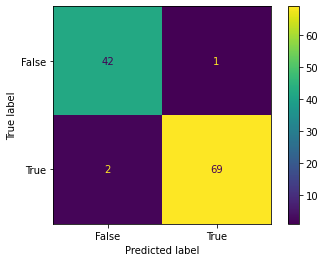

In [16]:
# plot the confusion matrix with sklearn and matplotlib
confusion_matrix = metrics.confusion_matrix(Y_test, Y_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### 4. Plot the value of the log-likelihood (the objective function) on every 100th iteration of your gradient ascent, with the iteration number on the horizontal axis and the objective value on the vertical axis

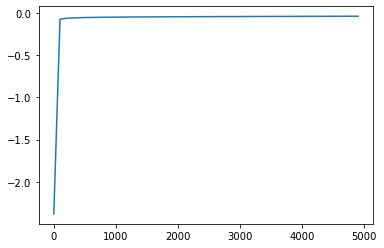

In [17]:
x_axis = list(range(0, 5000, 100))
plt.plot(x_axis,LL_list)

### 5. Use the test set as a validation set and see if you can find a better setting of the hyperparameters. Report the best values you found

1. raise the threshold from 0.5 to 0.8. The learning rate and the number iterations are unchanged

In [18]:
w,LL_list = coefficient_vector(X_train,Y_train,0.5,5000)

precision,recall,F1_score,Y_prediction = stats(X_test,Y_test,w,0.8)

print("The statistical figures regarding the predictions are shown below:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)

The statistical figures regarding the predictions are shown below:
Precision:  0.9855072463768116
Recall:  0.9577464788732394
F1 score:  0.9714285714285714


2. Lower the learning rate to 0.2. The threshold and the number of iterations are unchanged.

In [19]:
w,LL_list = coefficient_vector(X_train,Y_train,0.2,5000)

precision,recall,F1_score,Y_prediction = stats(X_test,Y_test,w,0.5)

print("The statistical figures regarding the predictions are shown below:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)

The statistical figures regarding the predictions are shown below:
Precision:  0.9857142857142858
Recall:  0.971830985915493
F1 score:  0.9787234042553192


3. Raise the number of iterations to 10000. Others remained unchanged.

In [20]:
w,LL_list = coefficient_vector(X_train,Y_train,0.5,10000)

precision,recall,F1_score,Y_prediction = stats(X_test,Y_test,w,0.5)

print("The statistical figures regarding the predictions are shown below:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)

The statistical figures regarding the predictions are shown below:
Precision:  0.9855072463768116
Recall:  0.9577464788732394
F1 score:  0.9714285714285714


4. Threshold: 0.8, Learning rate: 0.2, Number of iterations: 10000

In [21]:
w,LL_list = coefficient_vector(X_train,Y_train,0.2,10000)

precision,recall,F1_score,Y_prediction = stats(X_test,Y_test,w,0.8)

print("The statistical figures regarding the predictions are shown below:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", F1_score)

The statistical figures regarding the predictions are shown below:
Precision:  0.9852941176470589
Recall:  0.9436619718309859
F1 score:  0.9640287769784172


As shown above, I tried 4 cases with different parameters:
- Threshold: 0.8, Learning rate: 0.5, Number of iterations: 5000 
- Threshold: 0.5, Learning rate: 0.2, Number of iterations: 5000
- Threshold: 0.5, Learning rate: 0.5, Number of iterations: 10000
- Threshold: 0.8, Learning rate: 0.2, Number of iterations: 10000

To see the balanced performance of the model, I chose to compare F1-score

According to the result, all of them showed similar performance, all higher than 0.95. 
The result will vary according to the randomness of initial values of w and different selections of training and datasets. 
Therefore, I would say it never made a significant impact on the overall performance of the model.
So, I would say it is fine to stick to the original hyperparameters: *Threshold: 0.5, Learning rate: 0.5, Number of iterations: 5000*
